# 4章 ニューラルネットワークの学習

## 損失関数
### 二乗和誤差

In [ ]:
import numpy as np

# t: 教師データ
# index 2を正解とする
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# y: ニューラルネットワークの出力
# 例1.「2」の確率が最も高い場合(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

# 二乗和誤差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

# np.arrayはsumに渡すために変換をしている
mean_squared_error(np.array(y), np.array(t))
# => 0.0975000...31

# 例2.「7」の確率が最も高い場合(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))
# => 0.59750...3

# 2つの結果でわかることは、教師データとの誤差を表している
# 例1の結果のほうが値が小さいので誤差が小さいことがわかる。


### 交差エントロピー誤差

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
a = cross_entropy_error(np.array(y), np.array(t))
print(a)
# => 0.510825457099

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
b = cross_entropy_error(np.array(y), np.array(t))
print(b)
# => 2.30258409299


# こちらも1番目の結果の方が値が小さいので誤差が小さいと判断する

In [ ]:
np.random.choice(60000, 10)

In [ ]:
import numpy as np
import sys, os
sys.path.append(os.getcwd() + '/oreilly')
from dataset.mnist import load_mnist

# y : ニューラルネットワーク出力
# t : 教師データ
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, t.size)
        
    batch_size = y.shape[0]
    # バッチ枚数で正規化し、1枚あたりの平均の交差エントロピー誤差を計算する
    return -np.sum(t * np.log(y + delta)) / batch_size

# load_mnist内の関数（_change_one_hot_label）の定義側にtypoがあった
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print('batch_mask : %s', batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print('x_batch : %s', x_batch)
print('t_batch : %s', t_batch)


# 数値微分の例


In [ ]:
# y = 0.01x^2 + 0.1x

# ↑を関数にしたもの
def f_1(x):
    return (0.01 * x ** 2) + (0.1 * x)

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = f_1(x)

plt.title("f(x) = 0.01x^2 + 0.1x ")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
# f_1関数の微分をx=5, x=10の時にそれぞれで計算する

# 数値微分 中心差分
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    print("numerical_diff x : ", x)
    return (f(x + h) - f(x - h)) / (2 * h)

In [ ]:
numerical_diff(f_1, 5)

In [ ]:
numerical_diff(f_1, 10)

# 偏微分

$$ f(x_0, x_1) = x^2_0 + x^2_1 $$

In [ ]:
# ↑を実装するこうなる
def f_2(x):
    return x[0] ** 2 + x[1] ** 2

In [ ]:
# x0 = 3, x1 = 4のときのx0に対する偏微分を求める
def function_tmp1(x0):
    tmp = x0*x0 + 4.0 ** 2.0
    print("tmp1 : %s", tmp)
    return tmp

In [ ]:
numerical_diff(function_tmp1, 3.0)

# 勾配

In [ ]:
import numpy as np

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
#     print("x : %s", x)
#     print("grad : %s", grad)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # 今回は f(x, y) = x^2 + y^2
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値をもとに戻す
        
    return grad

In [ ]:
# => [6 8] xとyの偏微分の結果のベクトルがかえる
numerical_gradient(f_2, np.array([3.0, 4.0]))

In [ ]:
numerical_gradient(f_2, np.array([0.0, 2.0]))

In [ ]:
numerical_gradient(f_2, np.array([3.0, 0.0]))

# 勾配法

In [37]:
# f : 最適化したい関数
# init_x : 初期値
# lr(learning rate) : 学習率
# step_num : 勾配法による繰り返しの数
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        # numerical_gradientで求めた勾配に学習率をかけた値で更新する処理をstep_num回数繰り返す
        x -= lr * grad
            
    return x

In [34]:
# f(x0, x1) = x0^2 + x1^2 の最小値を勾配法で求める
init_x = np.array([-3.0, 4.0])
gradient_descent(f_2, init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

In [35]:
# 学習率が大きすぎる例：lr=10.0
gradient_descent(f_2, init_x, lr=10.0, step_num=100)

array([  2.34235971e+12,  -3.96091057e+12])

In [36]:
# 学習率が小さすぎる例 lr=1e-10
gradient_descent(f_2, init_x, lr=1e-10, step_num=100)

array([  2.34235971e+12,  -3.96091057e+12])

In [46]:
# 値の更新の履歴？の配列を返す。サンプルをコピペしただけ
def gradient_descent2(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy()) # copy -> 値渡し        
        grad = numerical_gradient(f, x)
        x -= lr * grad
            
    return x, np.array(x_history)

[ -6.11110793e-10   8.14814391e-10] [[ -3.00000000e+00   4.00000000e+00]
 [ -2.40000000e+00   3.20000000e+00]
 [ -1.92000000e+00   2.56000000e+00]
 [ -1.53600000e+00   2.04800000e+00]
 [ -1.22880000e+00   1.63840000e+00]
 [ -9.83040000e-01   1.31072000e+00]
 [ -7.86432000e-01   1.04857600e+00]
 [ -6.29145600e-01   8.38860800e-01]
 [ -5.03316480e-01   6.71088640e-01]
 [ -4.02653184e-01   5.36870912e-01]
 [ -3.22122547e-01   4.29496730e-01]
 [ -2.57698038e-01   3.43597384e-01]
 [ -2.06158430e-01   2.74877907e-01]
 [ -1.64926744e-01   2.19902326e-01]
 [ -1.31941395e-01   1.75921860e-01]
 [ -1.05553116e-01   1.40737488e-01]
 [ -8.44424930e-02   1.12589991e-01]
 [ -6.75539944e-02   9.00719925e-02]
 [ -5.40431955e-02   7.20575940e-02]
 [ -4.32345564e-02   5.76460752e-02]
 [ -3.45876451e-02   4.61168602e-02]
 [ -2.76701161e-02   3.68934881e-02]
 [ -2.21360929e-02   2.95147905e-02]
 [ -1.77088743e-02   2.36118324e-02]
 [ -1.41670994e-02   1.88894659e-02]
 [ -1.13336796e-02   1.51115727e-02]
 [

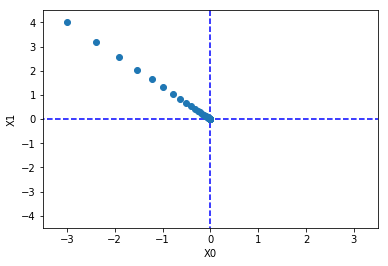

In [61]:
import numpy as np
import matplotlib.pylab as plt

lr = 0.1
step_num = 100
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent2(f_2, init_x, lr=lr, step_num=step_num)

print(x, x_history)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')

#  x_history[:,0] => 多次元配列。: (スライシング)は行全体で、0は行列の1列目すべて取得する。x軸。
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


[ -2.58983747e+13  -1.29524862e+12] [[ -3.00000000e+00   4.00000000e+00]
 [  5.70000000e+01  -7.60000000e+01]
 [ -1.08300000e+03   1.44400000e+03]
 [  2.05770000e+04  -2.74360000e+04]
 [ -3.90963008e+05   5.21284002e+05]
 [  7.42829664e+06  -9.90439654e+06]
 [ -1.41137328e+08   1.88183103e+08]
 [  2.68126267e+09  -3.57501690e+09]
 [ -5.09763373e+10   6.79001831e+10]
 [  9.45170863e+11  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [ -2.58983747e+13  -1.29524862e+12]
 [

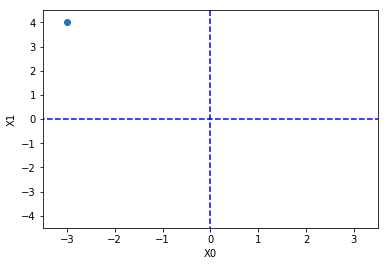

In [62]:
# 学習率が大きすぎる例：lr=10.0
lr = 10.0
step_num = 100

init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent2(f_2, init_x, lr=lr, step_num=step_num)

print(x, x_history)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')

plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


[-2.99999994  3.99999992]


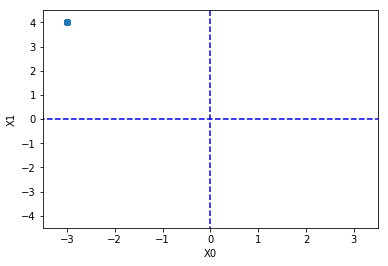

In [60]:
# 学習率が小さすぎる例 lr=1e-10
lr = 1e-10
step_num = 100

init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent2(f_2, init_x, lr=lr, step_num=step_num)

print(x, x_history)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')

plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


In [ ]:
# 偏微分のグラフ
def function_e0(x0):
    return x0*x0 + 1.0**2.0

x0s = np.arange(-3, 3, 0.5)
X = numerical_diff(function_e0, x0s)

In [ ]:
def function_e1(x1):
    return (1.0**2.0) + (x1 * x1)

x1s = np.arange(-3, 3, 0.5)
Y = numerical_diff(function_e1, x1s)

In [ ]:
# f(x0, x1) = x0^2 + x1^2 のグラフ

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

def f(x0, x1):
    return x[0]**2 + x[1]**2 

x0 = np.arange(-3, 3, 0.5)
x1 = np.arange(-3, 3, 0.5)
x0, x1 = np.meshgrid(x0, x1)
z = f(x0, x1)

print(z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x0,x1,z)

plt.show()

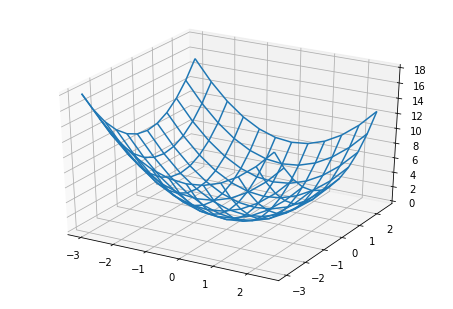

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(x0, x1):
    return x0**2 + x1**2

x0 = np.arange(-3, 3, 0.5)
x1 = np.arange(-3, 3, 0.5)
X0, X1 = np.meshgrid(x0, x1)
Y = func(X0, X1)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X0,X1,Y)
plt.show()